### Linear Regression - For stats modul

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [56]:
df = pd.read_csv ("Estuarine_Crocodile.csv")
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


### Calculate Correlation

In [57]:
df["BodyLength"].corr(df["HeadLength"])

0.9898911439276338

### Calculate Correlation Matrice

In [58]:
df.corr()

,HeadLength,BodyLength
HeadLength,1.000000,0.989891
BodyLength,0.989891,1.000000


### Scatter Plot

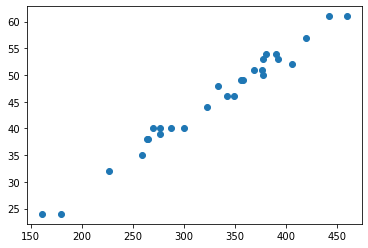

In [59]:
plt.scatter(df["BodyLength"], df["HeadLength"])
plt.show()

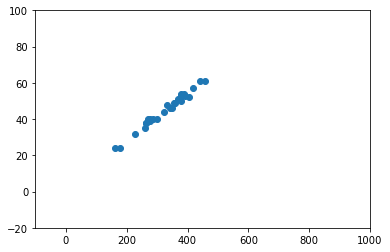

In [60]:
# alternative way:
plt.scatter(x = df["BodyLength"], y = df["HeadLength"])
plt.ylim([-20, 100])
plt.xlim([-100, 1000])
plt.show()

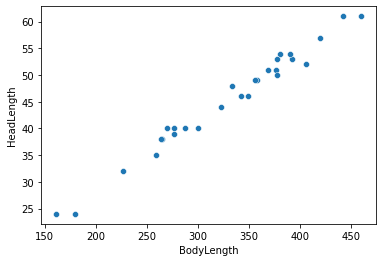

In [7]:
# using seaborn
sns.scatterplot(x = df["BodyLength"], y = df["HeadLength"])
plt.show()

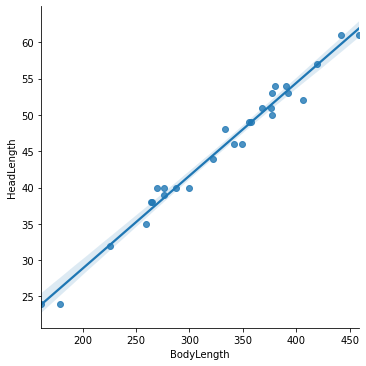

In [8]:
# using seaborn lmplot:
sns.lmplot(data = df, x ="BodyLength", y="HeadLength")
plt.show()

## Linear Regression

In [61]:
x = df["HeadLength"]
y = df["BodyLength"]
x = sm.add_constant(x)
# Stats does not have beta 0 by its own; otherwise than other packages
# Therefore we have to add a contant to X variable
# Statsmodel by default: Y = b_1*X
# But we want Y = b_0 + b_1*X
# Therefore we have to add a contant Variable 1 to our model: y = beta_1*x + beta_0 *1 -> y = beta_1*x + beta_0

In [62]:
model = sm.OLS(y,x)
print(model)
# First define dependent variable, than independent variable

In [63]:
results = model.fit()
print(results)

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        16:12:12   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Y predicted by our model

In [65]:
y_pred = results.predict(x)
y_pred

0     165.568483
1     165.568483
2     226.849320
3     249.829634
4     288.130157
5     288.130157
6     334.090785
7     349.410995
8     380.051413
9     448.992355
10    372.391309
11    395.371623
12    272.809948
13    334.090785
14    272.809948
15    357.071099
16    280.470053
17    357.071099
18    288.130157
19    387.711518
20    448.992355
21    387.711518
22    318.770576
23    395.371623
24    364.731204
25    418.351937
26    288.130157
27    372.391309
dtype: float64

#### Y in realtiy

In [26]:
y

0     161
1     179
2     226
3     259
4     287
5     300
6     342
7     333
8     406
9     459
10    376
11    380
12    265
13    349
14    264
15    358
16    276
17    356
18    270
19    392
20    442
21    377
22    322
23    390
24    377
25    419
26    276
27    368
Name: BodyLength, dtype: int64

#### Residuals

In [29]:
residuals = y-Y_pred

In [35]:
residuals

0     -4.568483
1     13.431517
2     -0.849320
3      9.170366
4     -1.130157
5     11.869843
6      7.909215
7    -16.410995
8     25.948587
9     10.007645
10     3.608691
11   -15.371623
12    -7.809948
13    14.909215
14    -8.809948
15     0.928901
16    -4.470053
17    -1.071099
18   -18.130157
19     4.288482
20    -6.992355
21   -10.711518
22     3.229424
23    -5.371623
24    12.268796
25     0.648063
26   -12.130157
27    -4.391309
dtype: float64

### Mean squared error:

In [66]:
np.mean(residuals*residuals)

10.85380541703758

#### RMSE

In [67]:
np.sqrt(np.mean(residuals**2))

3.2945114079386006

#### Mean of reiduals

In [68]:
np.mean(residuals)
# goes to zero

-3.3881465601639656e-17

### Plot x vs. predicted variable

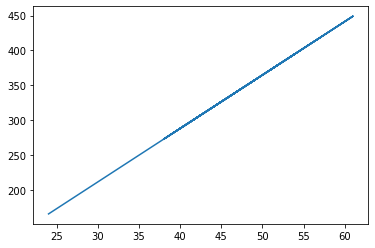

In [34]:
plt.plot(x["HeadLength"],Y_pred)
plt.show()

### Plot X vs. Y observed

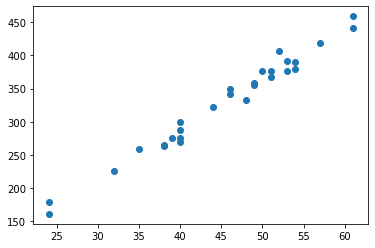

In [35]:
plt.plot(x["HeadLength"],y,"o")
plt.show()

#### Plot both in a graph

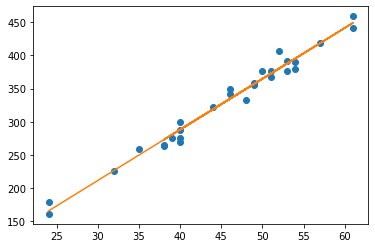

In [37]:
plt.plot(x["HeadLength"],y,"o")
plt.plot(x["HeadLength"],Y_pred)
plt.show()

# you see that predicted y is not completely on the line

### Plot X vs. redisulas

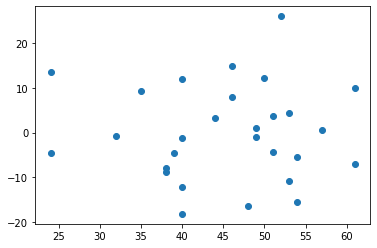

In [51]:
plt.plot(x["HeadLength"],residuals,"o")
plt.show()
# pattern here would say that our model is not correct or I could include more variables.

In [39]:
# improvement of model: 
# bigger sample size
# other variables to predict hight
# more varibales taken into account
# different regression model

### Using FitBit dataset

In [69]:
df = pd.read_csv ("FitBit2.csv")
df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


### Estimating OLS using statsmodels
[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

steps:
    1. correlation matrix
    2. scatterplot MinutesOfBeingAwake versus NumberOfAwakings
    3. regression with statsmodels: [MinutesOfBeingAwake] = b0 +b1*[NumberOfAwakings]

In [71]:
df.corr()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
Calorie burned,1.000000,0.255305,0.292790,0.130757,0.125353,0.209540,0.188256,0.197881,-0.130758,0.011485,...,0.030490,0.017460,0.292790,-0.041630,0.064943,0.011485,0.040965,0.048411,0.021207,0.005841
Steps,0.255305,1.000000,0.779678,0.306511,0.076906,0.393010,0.303244,0.571452,-0.160568,0.130986,...,0.106591,0.133405,0.779678,-0.024671,0.006498,0.130986,0.128463,0.089991,0.083499,-0.097077
Distance,0.292790,0.779678,1.000000,0.382940,0.160632,0.455272,0.348113,0.759310,-0.246853,0.129442,...,0.091095,0.134550,1.000000,-0.056472,0.069438,0.129442,0.126663,0.107858,0.075439,-0.122106
Floors,0.130757,0.306511,0.382940,1.000000,0.057812,-0.085992,0.278408,0.399503,-0.155532,0.069464,...,0.043459,0.075864,0.382940,-0.243848,0.296749,0.069464,0.057192,0.111600,0.092766,-0.032347
Minutes Sedentary,0.125353,0.076906,0.160632,0.057812,1.000000,0.217021,0.084137,0.105963,-0.161446,0.204242,...,0.178387,0.208539,0.160632,-0.069168,0.071185,0.204242,0.251996,0.069396,0.058520,-0.107068
Minutes Lightly Active,0.209540,0.393010,0.455272,-0.085992,0.217021,1.000000,0.014288,-0.034425,-0.219892,0.105048,...,0.087150,0.105406,0.455272,0.202433,-0.197896,0.105048,0.101216,0.020973,0.040472,-0.066958
Minutes Fairly Active,0.188256,0.303244,0.348113,0.278408,0.084137,0.014288,1.000000,0.337839,-0.204562,0.114950,...,0.100498,0.123034,0.348113,-0.098541,0.110282,0.114950,0.092485,0.191620,0.136397,0.105570
Minutes Very Active,0.197881,0.571452,0.759310,0.399503,0.105963,-0.034425,0.337839,1.000000,-0.187309,0.108018,...,0.099859,0.115641,0.759310,-0.111718,0.103940,0.108018,0.106693,0.120500,0.073853,-0.085153
Activity Calories,-0.130758,-0.160568,-0.246853,-0.155532,-0.161446,-0.219892,-0.204562,-0.187309,1.000000,-0.005804,...,0.022757,-0.004992,-0.246853,-0.074707,0.044292,-0.005804,-0.020122,-0.074408,-0.064989,-0.004207
MinutesOfSleep,0.011485,0.130986,0.129442,0.069464,0.204242,0.105048,0.114950,0.108018,-0.005804,1.000000,...,0.780512,0.997184,0.129442,-0.033913,0.094152,1.000000,0.807964,0.148113,0.095999,-0.127980


### Headmap

<AxesSubplot:>

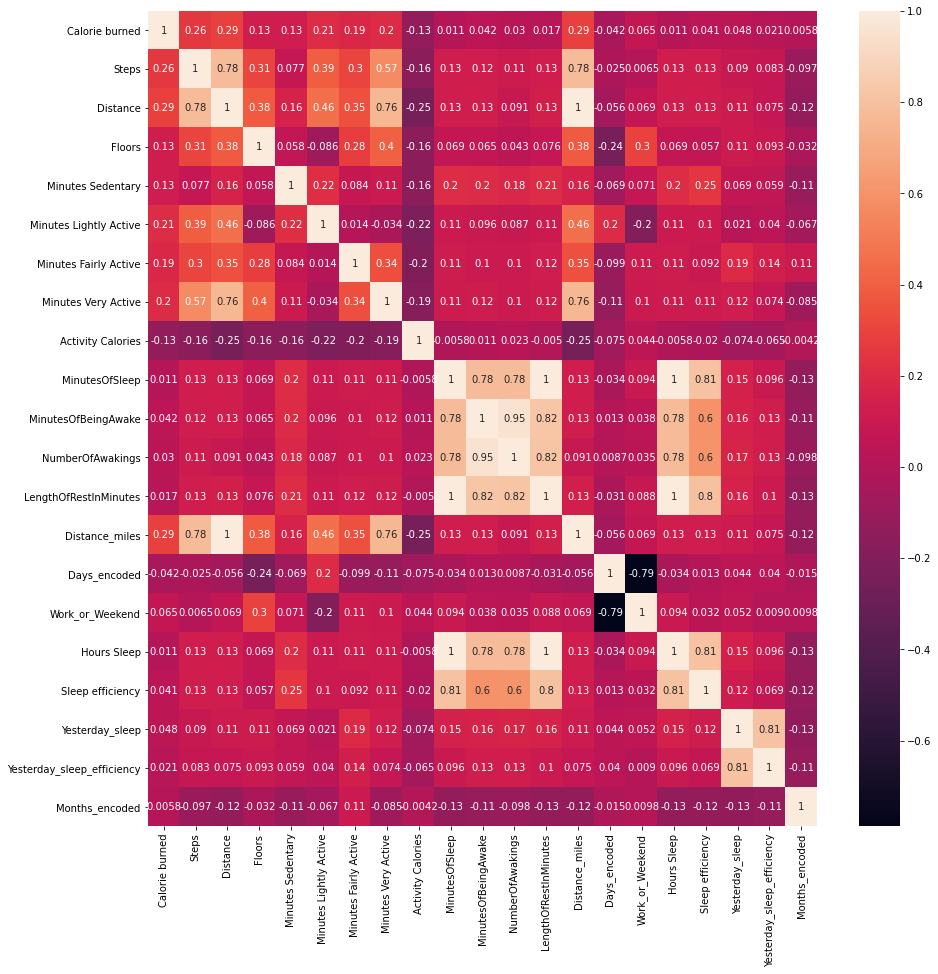

In [76]:
plt.figure(figsize = [15, 15])
sns.heatmap(df.corr(), annot = True)

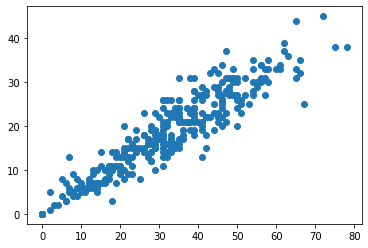

In [72]:
plt.scatter(df["MinutesOfBeingAwake"], df["NumberOfAwakings"])
plt.show()

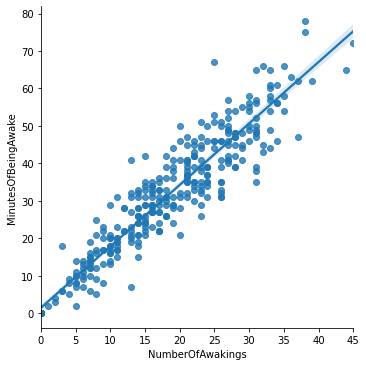

In [78]:
#alternative:
sns.lmplot(data = df, x = 'NumberOfAwakings', y = 'MinutesOfBeingAwake')

In [81]:
x = df["MinutesOfBeingAwake"]
y = df["NumberOfAwakings"]
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       NumberOfAwakings   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 12 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                        16:21:28   Log-Likelihood:                -958.31
No. Observations:                 367   AIC:                             1921.
Df Residuals:                     365   BIC:                             1928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7290      0.313      2.331      0.020       0.114       1.344
MinutesOfBeingAwake     0.5522      0.009     59.297      0.000       0.534       0.571
==============================================================================
Omnibus:                       15.113   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               26.306
Skew:                           0.248   Prob(JB):                     1.94e-06
Kurtosis:                       4.215   Cond. No.                         60.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

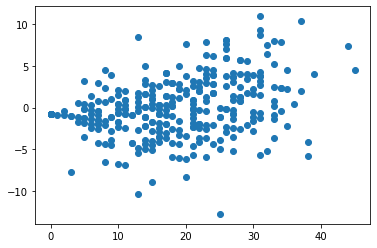

In [84]:
y_pred = results.predict(x)
residuals = y - y_pred
plt.scatter(y, residuals)
plt.show()

In [ ]:
# Y = b0 + b1 * X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]
# [MinutesOfBeingAwake] = 1.4381 + 1.6405 * [NumberOfAwakings]
# NumberOfAwakings = 5
# MinutesOfBeingAwake = 1.4381 + 1.6405 * 5 = 9.64
# NumberOfAwakings = 6
# MinutesOfBeingAwake = 1.4381 + 1.6405 * 6 = 11.28
# interpretation of b1: if we change X by one unit, Y changes by b1 = 1.6405 units

# interpretations of b1: if we change X by one unit, Y changes by 1.6405
# b1: how quickly does Y change, when X changes


### Estimating OLS using statsmodels
[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings] + b2 * [Distance_miles]

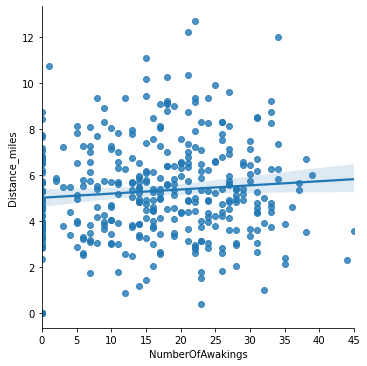

In [90]:
sns.lmplot(data = df, x = 'NumberOfAwakings', y = 'Distance_miles')
plt.show()

In [86]:
Y = df['MinutesOfBeingAwake']
X = df[['NumberOfAwakings', 'Distance_miles']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Thu, 12 Nov 2020   Prob (F-statistic):          3.22e-189
Time:                         16:23:38   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance_miles       0.3860      0.140      2.761      0.006       0.111       0.661
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         60.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

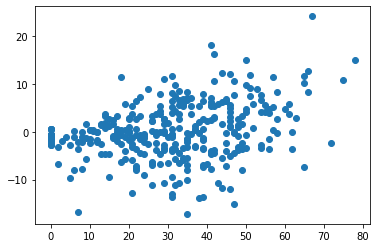

In [88]:
Y_pred = results.predict(X)
residuals = Y - Y_pred
plt.scatter(Y, residuals)
plt.show()

In [ ]:
# Y = b0 + b1 * X + b2 * X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings] + b2[Distance_miles]
# [MinutesOfBeingAwake] = -.5001 + 1.6336 * [NumberOfAwakings] + 0.3860 * [Distance_miles]
# NumberOfAwakings = 5 --> # MinutesOfBeingAwake = 9.64
# NumberOfAwakings = 6 --> # MinutesOfBeingAwake = 11.28

# bx = partial effect

In [89]:
# Plotting: Difference vs:
    # sns.regplot
    # plt.scatter
    # plt.scatterplot
    # plt.lmplot